In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from pathlib import Path
import shutil
import numpy as np
import thor.data as data
import thor.data.dispatch as dispatch
import thor.grid as grid
import thor.track as track
import thor.option as option
import thor.visualize as visualize
import thor.analyze as analyze
import thor.option as option
import thor.attribute as attribute
import thor.utils as utils

notebook_name = "cpol_demo.ipynb"


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



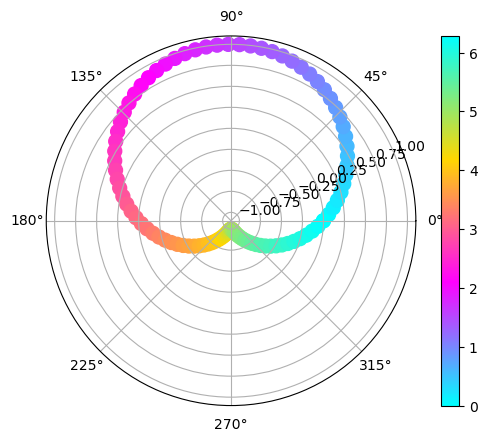

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define your custom colors
colors = ["cyan", "magenta", "gold", "cyan"]

# Create a LinearSegmentedColormap
cyclic_cmap = mcolors.LinearSegmentedColormap.from_list('custom_cyclic', colors, N=256)

# Example data
theta = np.linspace(0, 2 * np.pi, 100)
r = np.sin(theta)

# Plot using the custom cyclic colormap
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
c = ax.scatter(theta, r, c=theta, cmap=cyclic_cmap, s=100)
fig.colorbar(c, ax=ax)
plt.show()

In [3]:
# Parent directory for saving outputs
base_local = Path.home() / "THOR_output"
start = "2005-11-13T18:00:00"
end = "2005-11-13T20:00:00"

output_directory = base_local / "runs/cpol_demo_geographic"
options_directory = output_directory / "options"

if output_directory.exists():
    shutil.rmtree(output_directory)

# Create the data_options dictionary
converted_options = {"save": True, "load": False, "parent_converted": None}
cpol_options = data.aura.cpol_data_options(
    start=start, end=end, converted_options=converted_options
)
# Restrict the ERA5 data to a smaller region containing the CPOL radar
lon_range = [129, 133]
lat_range = [-14, -10]
era5_pl_options = data.era5.data_options(
    start=start, end=end, latitude_range=lat_range, longitude_range=lon_range
)
era5_sl_options = data.era5.data_options(
    start=start,
    end=end,
    data_format="single-levels",
    latitude_range=lat_range,
    longitude_range=lon_range,
)
data_options = option.consolidate_options(
    [cpol_options, era5_pl_options, era5_sl_options]
)

dispatch.check_data_options(data_options)
data.option.save_data_options(data_options, options_directory)

altitude = list(np.arange(0, 20e3 + 500, 500))
altitude = [float(alt) for alt in altitude]
grid_options = grid.create_options(name="geographic", altitude=altitude)
grid.check_options(grid_options)
grid.save_grid_options(grid_options, options_directory)

# Create the track_options dictionary
track_options = option.default_track_options(dataset="cpol")
track_options.to_yaml(options_directory / "track.yml")

# Create the display_options dictionary
visualize_options = {
    obj: visualize.option.runtime_options(obj, save=True, style="presentation")
    for obj in ["mcs"]
}
visualize_options["middle_echo"] = visualize.option.runtime_options(
    "middle_echo", save=True, style="presentation", figure_types=["mask"]
)
# visualize.option.save_display_options(visualize_options, options_directory)
visualize_options = None

2024-10-29 10:17:14,348 - thor.grid - WARNING - Shape not specified. Will attempt to infer from input.
2024-10-29 10:17:14,350 - thor.grid - WARNING - Coordinates not specified. Will attempt to infer from input.


In [4]:
times = data.utils.generate_times(data_options["cpol"])
tracks = track.simultaneous_track(
    times,
    data_options,
    grid_options,
    track_options,
    visualize_options,
    output_directory=output_directory
)

2024-10-29 10:17:23,349 - thor.track - INFO - Beginning thor run. Saving output to /home/ewan/THOR_output/runs/cpol_demo_geographic.
2024-10-29 10:17:23,354 - thor.track - INFO - Beginning simultaneous tracking.
2024-10-29 10:17:23,680 - thor.track - INFO - Processing 2005-11-13T18:00:08.
2024-10-29 10:17:23,681 - thor.data.aura - INFO - Updating cpol dataset for 2005-11-13T18:00:08.
2024-10-29 10:17:23,682 - thor.data.aura - INFO - Converting cpol data from twp10cpolgrid150.b2.20051113.180000.nc
2024-10-29 10:17:23,759 - thor.data.aura - INFO - Creating new geographic grid with spacing 0.025 m, 0.025 m.
2024-10-29 10:17:28,076 - thor.track - INFO - Processing hierarchy level 0.
2024-10-29 10:17:28,077 - thor.track - INFO - Tracking convective.
2024-10-29 10:17:44,140 - thor.track - INFO - Tracking middle.
2024-10-29 10:17:44,145 - thor.track - INFO - Tracking anvil.
2024-10-29 10:17:44,152 - thor.track - INFO - Processing hierarchy level 1.
2024-10-29 10:17:44,153 - thor.track - INFO 

# Cartesian Coordinates

In [88]:
output_directory = base_local / "runs/cpol_demo_cartesian"
options_directory = output_directory / "options"

if output_directory.exists():
    shutil.rmtree(output_directory)

grid_options = grid.create_options(name="cartesian", regrid=False, altitude=altitude)
grid.check_options(grid_options)
grid.save_grid_options(grid_options, options_directory)
data.option.save_data_options(data_options, options_directory)
track_options.to_yaml(options_directory / "track.yml")
# track_options.to_yaml(options_directory / "track.yml")
# visualize.option.save_display_options(visualize_options, options_directory)

times = data.utils.generate_times(data_options["cpol"])
tracks = track.simultaneous_track(
    times,
    data_options,
    grid_options,
    track_options,
    visualize_options,
    output_directory=output_directory,
)

2024-10-16 14:05:55,282 - thor.grid - WARNING - Shape not specified. Will attempt to infer from input.
2024-10-16 14:05:55,284 - thor.option - DEBUG - Saving options to /home/ewan/THOR_output/runs/cpol_demo_cartesian/options/grid.yml
2024-10-16 14:05:55,290 - thor.option - DEBUG - Saving options to /home/ewan/THOR_output/runs/cpol_demo_cartesian/options/data.yml
2024-10-16 14:05:55,442 - thor.track - INFO - Beginning thor run. Saving output to /home/ewan/THOR_output/runs/cpol_demo_cartesian.
2024-10-16 14:05:55,443 - thor.track - INFO - Beginning simultaneous tracking.
2024-10-16 14:05:55,501 - thor.track - INFO - Processing 2005-11-13T18:00:08.
2024-10-16 14:05:55,502 - thor.data.aura - INFO - Updating cpol dataset for 2005-11-13T18:00:08.
2024-10-16 14:05:55,503 - thor.data.aura - INFO - Converting cpol data from twp10cpolgrid150.b2.20051113.180000.nc
2024-10-16 14:05:55,651 - thor.track - INFO - Processing hierarchy level 0.
2024-10-16 14:05:55,652 - thor.track - INFO - Tracking con

# Analysis

In [26]:
analysis_options = analyze.mcs.analysis_options()
output_directory = base_local / "runs/cpol_demo_geographic"
utils.save_options(analysis_options, filename="analysis", options_directory=output_directory / "options")
analyze.mcs.process_velocities(output_directory)
analyze.mcs.quality_control(output_directory, analysis_options)
analyze.mcs.classify_all(output_directory)

2024-10-16 15:04:36,391 - thor.option - DEBUG - Saving options to /home/ewan/THOR_output/runs/cpol_demo_geographic/options/analysis.yml
2024-10-16 15:04:41,133 - thor.write.attribute - DEBUG - Writing attribute dataframe to /home/ewan/THOR_output/runs/cpol_demo_geographic/analysis/velocities.csv
2024-10-16 15:04:41,146 - thor.write.attribute - DEBUG - Saving attribute metadata to /home/ewan/THOR_output/runs/cpol_demo_geographic/analysis/velocities.yml
2024-10-16 15:04:42,180 - thor.write.attribute - DEBUG - Writing attribute dataframe to /home/ewan/THOR_output/runs/cpol_demo_geographic/analysis/quality.csv
2024-10-16 15:04:42,183 - thor.write.attribute - DEBUG - Saving attribute metadata to /home/ewan/THOR_output/runs/cpol_demo_geographic/analysis/quality.yml
2024-10-16 15:04:42,342 - thor.write.attribute - DEBUG - Writing attribute dataframe to /home/ewan/THOR_output/runs/cpol_demo_geographic/analysis/classification.csv
2024-10-16 15:04:42,345 - thor.write.attribute - DEBUG - Saving a

,,stratiform_offset,inflow,relative_stratiform_offset,tilt,propagation
time,universal_id,,,,,
2005-11-13 18:00:08,1,trailing,front,trailing,up-shear,down-shear
2005-11-13 18:10:23,1,trailing,left,left,up-shear,shear-perpendicular
2005-11-13 18:20:09,1,trailing,left,left,up-shear,shear-perpendicular
2005-11-13 18:30:09,1,trailing,left,left,up-shear,shear-perpendicular
2005-11-13 18:40:09,1,trailing,left,left,up-shear,shear-perpendicular
2005-11-13 18:50:08,1,trailing,left,left,up-shear,shear-perpendicular
2005-11-13 19:00:08,1,trailing,left,left,up-shear,shear-perpendicular
2005-11-13 19:10:23,1,trailing,left,left,up-shear,shear-perpendicular
2005-11-13 19:20:09,1,trailing,left,left,up-shear,shear-perpendicular


In [39]:
figure_options = visualize.option.horizontal_attribute_options(
    "mcs_velocity_analysis", style="presentation"
)
start_time = np.datetime64("2005-11-13T14:00")
end_time = np.datetime64("2005-11-13T20:00")
visualize.attribute.mcs_series(output_directory, start_time, end_time, figure_options, parallel_figure=True)

2024-10-16 15:20:34,788 - thor.data.aura - INFO - Converting cpol data from twp10cpolgrid150.b2.20051113.180000.nc
2024-10-16 15:20:34,837 - thor.data.aura - INFO - Creating new geographic grid with spacing 0.025 m, 0.025 m.
2024-10-16 15:20:35,266 - thor.visualize.attribute - DEBUG - Getting grid from dataset at time 2005-11-13T18:00:08.000000000.
2024-10-16 15:20:35,267 - thor.visualize.attribute - DEBUG - Rebuilding processed grid for time 2005-11-13T18:00:08.000000000.
2024-10-16 15:20:35,534 - thor.visualize.attribute - DEBUG - Creating grouped mask figure at time 2005-11-13T18:00:08.000000000.
2024-10-16 15:20:35,535 - thor.visualize.horizontal - INFO - No figsize provided. Using default.
2024-10-16 15:20:35,728 - thor.visualize.horizontal - DEBUG - Plotting boundary.
2024-10-16 15:20:35,759 - thor.visualize.horizontal - DEBUG - Plotting boundary.
2024-10-16 15:20:35,959 - thor.visualize.attribute - DEBUG - Saving mcs_velocity_analysis figure for 2005-11-13T18:00:08.000000000.
20